In [3]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Adjust paths as necessary
path_to_train = 'sample_data/train.csv'

# Load the datasets
train_data = pd.read_csv(path_to_train)

# Prepare the data
X = train_data.drop('Transported', axis=1)
y = train_data['Transported'].astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Display some of the training data
print(X_train.head())
print(y_train.head())

# Define columns
categorical_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Set up preprocessing for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with the mean of the column
    ('scaler', StandardScaler()),                # Scale data to have mean=0 and variance=1
    ('poly', PolynomialFeatures(degree=2, include_bias=False))  # Generate polynomial and interaction features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Replace missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # Convert categorical data into dummy/indicator variables
])

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Initialize the model with logistic regression
model = LogisticRegression(solver='liblinear')

# Create the pipeline with preprocessing and the model
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Setup grid search to explore different regularization strengths and types
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],  # C is the inverse of regularization strength; smaller values specify stronger regularization.
    'model__penalty': ['l1', 'l2']  # L1 and L2 regularization
}

grid_clf = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_clf.fit(X_train, y_train)

     PassengerId HomePlanet CryoSleep     Cabin  Destination   Age    VIP  \
2333     2513_01      Earth     False       NaN  TRAPPIST-1e  28.0  False   
2589     2774_02      Earth     False   F/575/P  TRAPPIST-1e  17.0  False   
8302     8862_04     Europa      True   C/329/S  55 Cancri e  28.0  False   
8177     8736_02       Mars     False  F/1800/P  TRAPPIST-1e  20.0  False   
500      0539_02     Europa      True    C/18/P  55 Cancri e  36.0  False   

      RoomService  FoodCourt  ShoppingMall    Spa  VRDeck               Name  
2333          0.0       55.0           0.0  656.0     0.0     Loree Mathison  
2589          0.0     1195.0          31.0    0.0     0.0  Crisey Mcbriddley  
8302          0.0        0.0           0.0    0.0     0.0     Alramix Myling  
8177          NaN        2.0         289.0  976.0     0.0          Tros Pota  
500           0.0        0.0           0.0    0.0     0.0     Achyon Nalanet  
2333    0
2589    0
8302    1
8177    1
500     1
Name: Transpo

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False))]),
                                                                         ['Age',
                                                                          'RoomService',
                                                                          'FoodCourt',
                                                                          'ShoppingMall',
                                                                          'Spa',
                                                                          'VRDeck']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['HomePlanet',
                                                                          'CryoSleep',
                                                                          'Cabin',
                                                                          'Destination',
                                                                          'VIP'])])),
                                       ('model',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'model__C': [0.01, 0.1, 1, 10, 100],
                         'model__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [5]:
# Display best parameters and best score
print("Best parameters:", grid_clf.best_params_)
print("Best score:", grid_clf.best_score_)

Best parameters: {'model__C': 10, 'model__penalty': 'l1'}
Best score: 0.7950829846546916


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


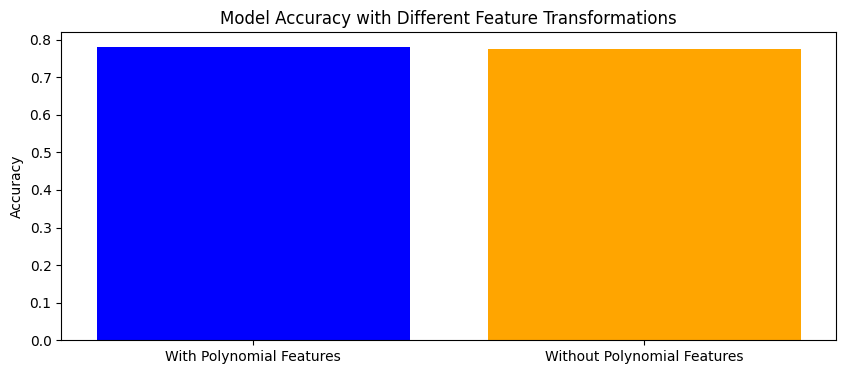

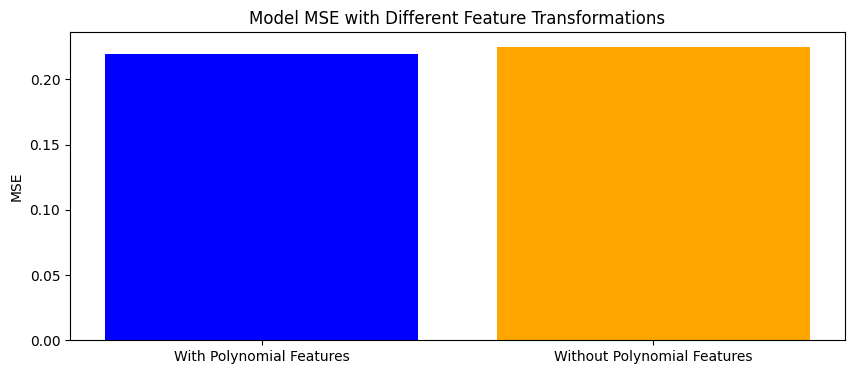

In [6]:
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

# Train and evaluate the model with polynomial features
pipeline_with_poly = clf
pipeline_with_poly.fit(X_train, y_train)
preds_with_poly = pipeline_with_poly.predict(X_test)
accuracy_with_poly = accuracy_score(y_test, preds_with_poly)
mse_with_poly = mean_squared_error(y_test, preds_with_poly)

# Modify the pipeline to remove polynomial features transformation
numerical_transformer_no_poly = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
preprocessor_no_poly = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_no_poly, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)
clf_no_poly = Pipeline(steps=[
    ('preprocessor', preprocessor_no_poly),
    ('model', LogisticRegression(solver='liblinear'))
])

# Train and evaluate the model without polynomial features
clf_no_poly.fit(X_train, y_train)
preds_no_poly = clf_no_poly.predict(X_test)
accuracy_no_poly = accuracy_score(y_test, preds_no_poly)
mse_no_poly = mean_squared_error(y_test, preds_no_poly)

# Plotting accuracy comparison
plt.figure(figsize=(10, 4))
bar_positions = np.arange(2)
bar_heights = [accuracy_with_poly, accuracy_no_poly]
plt.bar(bar_positions, bar_heights, color=['blue', 'orange'])
plt.xticks(bar_positions, ['With Polynomial Features', 'Without Polynomial Features'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy with Different Feature Transformations')
plt.show()

# Plotting MSE comparison
plt.figure(figsize=(10, 4))
bar_heights = [mse_with_poly, mse_no_poly]
plt.bar(bar_positions, bar_heights, color=['blue', 'orange'])
plt.xticks(bar_positions, ['With Polynomial Features', 'Without Polynomial Features'])
plt.ylabel('MSE')
plt.title('Model MSE with Different Feature Transformations')
plt.show()


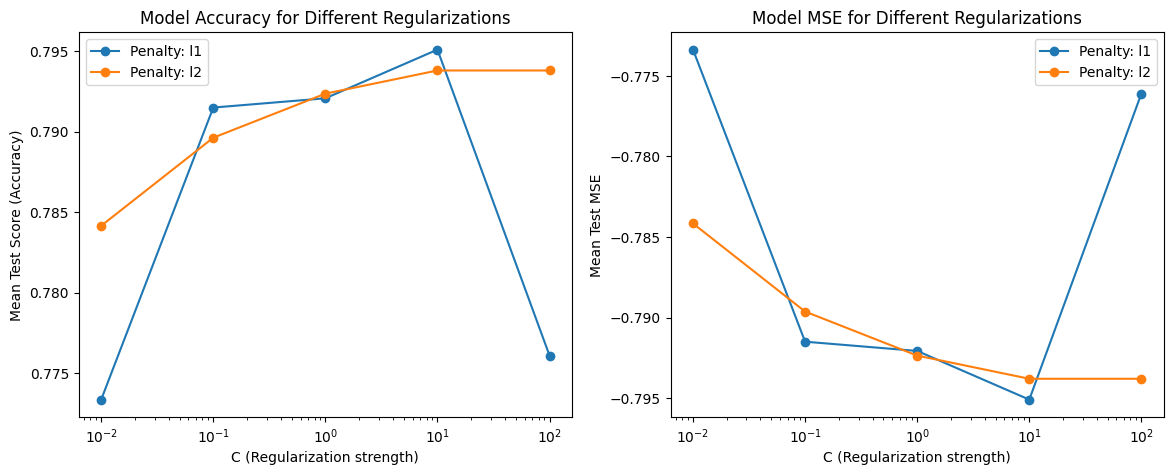

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'grid_clf' is your GridSearchCV object
results = pd.DataFrame(grid_clf.cv_results_)

# Extract mean test score (accuracy) and mean test mse from the results
results['mean_test_mse'] = -results['mean_test_score']  # Convert scores to mse for demonstration

# Plotting setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot for Accuracy
for label, df in results.groupby('param_model__penalty'):
    ax1.plot(df['param_model__C'], df['mean_test_score'], marker='o', label=f'Penalty: {label}')
ax1.set_title('Model Accuracy for Different Regularizations')
ax1.set_xlabel('C (Regularization strength)')
ax1.set_ylabel('Mean Test Score (Accuracy)')
ax1.set_xscale('log')
ax1.legend()

# Plot for MSE
for label, df in results.groupby('param_model__penalty'):
    ax2.plot(df['param_model__C'], df['mean_test_mse'], marker='o', label=f'Penalty: {label}')
ax2.set_title('Model MSE for Different Regularizations')
ax2.set_xlabel('C (Regularization strength)')
ax2.set_ylabel('Mean Test MSE')
ax2.set_xscale('log')
ax2.legend()

plt.show()


Accuracy: 0.7752
Mean Squared Error: 0.2248


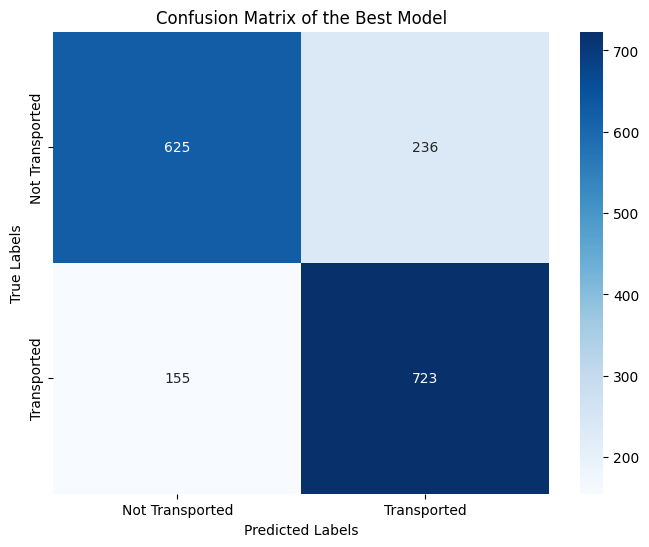

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using the best estimator from GridSearchCV
best_model = grid_clf.best_estimator_
predictions = best_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.4f}")
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Transported', 'Transported'],
            yticklabels=['Not Transported', 'Transported'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of the Best Model')
plt.show()


In [9]:
import pandas as pd

results = pd.DataFrame(grid_clf.cv_results_)

# Extract the parameters and corresponding test scores
results_table = results.loc[:, [
    'param_model__C',
    'param_model__penalty',
    'mean_test_score',
]]

results_table['mean_test_mse'] = -results['mean_test_score']

# Rename the columns for readability
results_table.rename(columns={
    'param_model__C': 'C (Regularization strength)',
    'param_model__penalty': 'Penalty',
    'mean_test_score': 'Mean Test Score (Accuracy)',
}, inplace=True)


results_table.sort_values(by='Mean Test Score (Accuracy)', ascending=False, inplace=True)


results_table['Mean Test Score (Accuracy)'] = results_table['Mean Test Score (Accuracy)'].round(4)
results_table['mean_test_mse'] = results_table['mean_test_mse'].round(4)


print(results_table)


results_table.to_csv('model_results.csv', index=False)


  C (Regularization strength) Penalty  Mean Test Score (Accuracy)  \
6                          10      l1                      0.7951   
9                         100      l2                      0.7938   
7                          10      l2                      0.7938   
5                           1      l2                      0.7924   
4                           1      l1                      0.7921   
2                         0.1      l1                      0.7915   
3                         0.1      l2                      0.7896   
1                        0.01      l2                      0.7842   
8                         100      l1                      0.7761   
0                        0.01      l1                      0.7734   

   mean_test_mse  
6        -0.7951  
9        -0.7938  
7        -0.7938  
5        -0.7924  
4        -0.7921  
2        -0.7915  
3        -0.7896  
1        -0.7842  
8        -0.7761  
0        -0.7734  
